# Decision Tree Lab

## Decision Tree Example

from http://scikit-learn.org/stable/modules/tree.html

In [4]:
from sklearn import decomposition, datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the iris dataset
iris = datasets.load_iris()
x = iris.data[:,:]  
y = iris.target

# Split the data into training/testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.60, random_state=42)

# Create decision tree object and train the model using the training sets
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

#Use trained model to predict training set and calculate accuracy score
yhat_train = clf.predict(x_train)
acc_train = accuracy_score(y_train, yhat_train)

print("accuracy score for train dataset: {} %".format('%0.2f'%(acc_train*100)))
print("confusion matrix for train dataset: \n")
print(confusion_matrix(y_train,yhat_train))


#Use trained model to predict testing set and calculate accuracy score
yhat_test = clf.predict(x_test)
acc_test = accuracy_score(y_test, yhat_test)

print("\naccuracy score for test dataset: {} %".format('%0.2f'%(acc_test*100)))
print("confusion matrix for test dataset: \n")
print(confusion_matrix(y_test, yhat_test))

accuracy score for train dataset: 100.00 %
confusion matrix for train dataset: 

[[15  0  0]
 [ 0 21  0]
 [ 0  0 24]]

accuracy score for test dataset: 97.78 %
confusion matrix for test dataset: 

[[35  0  0]
 [ 0 27  2]
 [ 0  0 26]]


confusion matrix will be 3 by 3 because there have 3 species

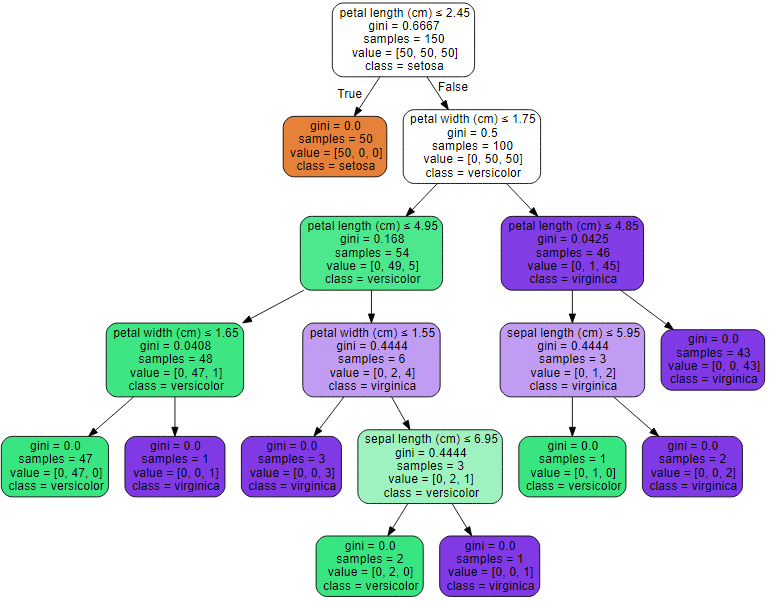

In [6]:
from IPython.display import Image
from IPython.display import display

Image(filename='iris.png')

## Lab Instruction

### Part 1: Importing the Dataset

Import "Decision Tree Lab.csv".

In [32]:
import pandas as pd
data = pd.read_csv("Decision Tree Lab.csv",index_col=0);

In [34]:
display(data.head())
print(data.shape)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,High
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,Medium
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,High
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,Medium
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,High


(1460, 81)


### Part 2: Preprocessing

Preprocess the dataset as you did in previous labs.

In [93]:
data.isna().mean()[data.isna().mean() > 0]

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

### cutting off the cols that have missing value more than 30 %

In [36]:
missing_data_cols = data.isna().mean()[data.isna().mean() < 0.3].index
data2 = data.loc[:,missing_data_cols]
display(data2.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,High
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,Medium
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,High
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,Medium
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,High


In [37]:
impute_cols = data2.isna().mean()[data2.isna().mean() > 0].index
data2.loc[:,impute_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 14 columns):
LotFrontage     1201 non-null float64
MasVnrType      1452 non-null object
MasVnrArea      1452 non-null float64
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinType2    1422 non-null object
Electrical      1459 non-null object
GarageType      1379 non-null object
GarageYrBlt     1379 non-null float64
GarageFinish    1379 non-null object
GarageQual      1379 non-null object
GarageCond      1379 non-null object
dtypes: float64(3), object(11)
memory usage: 171.1+ KB


In [38]:
# Drop na instead
data2.dropna(inplace=True)
data2.drop_duplicates(inplace=True)
print(data2.shape)

(1094, 76)


In [44]:
with pd.option_context("display.max_rows",None,"display.max_columns", None):
    display(data2.describe())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,727.375686,56.128885,70.759598,10132.346435,6.247715,5.575868,1972.412249,1985.915905,109.855576,448.191956,45.252285,606.117002,1099.561243,1173.809872,356.536563,4.680987,1535.027422,0.423218,0.056673,1.577697,0.389397,2.861974,1.033821,6.570384,0.610603,1978.565814,1.879342,503.760512,94.341865,46.946984,22.053016,3.266910,16.498172,3.007313,23.550274,6.335466,2007.786106
std,420.955488,41.976345,24.508859,8212.249621,1.366797,1.066500,31.189752,20.930772,190.667459,468.728095,159.075003,445.834636,415.851262,387.677463,439.260130,42.099821,526.124028,0.514253,0.235244,0.550219,0.500793,0.764107,0.185841,1.584486,0.633118,25.934444,0.658586,192.261314,122.624615,64.820019,61.570502,29.655973,58.455303,40.713175,167.135237,2.694558,1.334307
min,1.000000,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,366.500000,20.000000,60.000000,7606.750000,5.000000,5.000000,1953.000000,1967.000000,0.000000,0.000000,0.000000,270.000000,816.000000,894.000000,0.000000,0.000000,1164.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,723.500000,50.000000,70.000000,9444.500000,6.000000,5.000000,1975.000000,1995.000000,0.000000,384.500000,0.000000,525.000000,1023.000000,1097.000000,0.000000,0.000000,1480.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1982.000000,2.000000,484.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1093.750000,70.000000,80.000000,11387.250000,7.000000,6.000000,2003.000000,2005.000000,171.750000,712.750000,0.000000,846.000000,1345.500000,1413.500000,729.000000,0.000000,1779.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,602.500000,169.750000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,2.000000,2.000000,3.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,2500.000000,12.000000,2010.000000


In [49]:
# y = data2.pop("SalePrice")
print(y.head())

0      High
1    Medium
2      High
3    Medium
4      High
Name: SalePrice, dtype: object


In [51]:
y.unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [71]:
# Converting class to no.
y[y == "High"] = 2
y[y == "Medium"] = 1
y[y == "Low"] = 0
print(y.head())

0    2
1    1
2    2
3    1
4    2
Name: SalePrice, dtype: object


In [78]:
y = pd.to_numeric(y, errors="coerce")
y.dtypes

dtype('int64')

In [97]:
x = data2.iloc[:,1:].copy()
with pd.option_context("display.max_rows",None,"display.max_columns", None):
    display(x.head())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal


In [98]:
x.loc[:,'SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'Family', 'Alloca', 'AdjLand'],
      dtype=object)

In [99]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 74 columns):
MSSubClass       1094 non-null int64
MSZoning         1094 non-null object
LotFrontage      1094 non-null float64
LotArea          1094 non-null int64
Street           1094 non-null object
LotShape         1094 non-null object
LandContour      1094 non-null object
Utilities        1094 non-null object
LotConfig        1094 non-null object
LandSlope        1094 non-null object
Neighborhood     1094 non-null object
Condition1       1094 non-null object
Condition2       1094 non-null object
BldgType         1094 non-null object
HouseStyle       1094 non-null object
OverallQual      1094 non-null int64
OverallCond      1094 non-null int64
YearBuilt        1094 non-null int64
YearRemodAdd     1094 non-null int64
RoofStyle        1094 non-null object
RoofMatl         1094 non-null object
Exterior1st      1094 non-null object
Exterior2nd      1094 non-null object
MasVnrType       1094 no

In [101]:
x_numeric = x.loc[:,x.dtypes != object].copy()
x_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 36 columns):
MSSubClass       1094 non-null int64
LotFrontage      1094 non-null float64
LotArea          1094 non-null int64
OverallQual      1094 non-null int64
OverallCond      1094 non-null int64
YearBuilt        1094 non-null int64
YearRemodAdd     1094 non-null int64
MasVnrArea       1094 non-null float64
BsmtFinSF1       1094 non-null int64
BsmtFinSF2       1094 non-null int64
BsmtUnfSF        1094 non-null int64
TotalBsmtSF      1094 non-null int64
1stFlrSF         1094 non-null int64
2ndFlrSF         1094 non-null int64
LowQualFinSF     1094 non-null int64
GrLivArea        1094 non-null int64
BsmtFullBath     1094 non-null int64
BsmtHalfBath     1094 non-null int64
FullBath         1094 non-null int64
HalfBath         1094 non-null int64
BedroomAbvGr     1094 non-null int64
KitchenAbvGr     1094 non-null int64
TotRmsAbvGrd     1094 non-null int64
Fireplaces       1094 non-null int64
G

###  incase I would like to use the catagorical data also

In [106]:
x_getdummy = pd.concat([pd.get_dummies(x.select_dtypes(include=['object'])), # get dummy for object type
                       x.select_dtypes(include=['int64','float64'])],axis=1) # select the int, and float for make predictors 

In [109]:
x_getdummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Columns: 259 entries, MSZoning_C (all) to YrSold
dtypes: float64(3), int64(33), uint8(223)
memory usage: 554.5 KB


In [112]:
# get dummy will convert the data into numerical form
with pd.option_context("display.max_rows",None,"display.max_columns", None):
    display(x_getdummy.head())

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,

### Part 3: Perform Decision Tree Classifier 

You can import a Decision Tree Classifier by using the following codes:

the choice between using the get_dummy and multiclass variable is depended on which one is minimized the objective function

In [108]:
from sklearn import decomposition, datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

x = x_getdummy;
y = y;

# Split the data into training/testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.60, random_state=42)

# Create decision tree object and train the model using the training sets
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

#Use trained model to predict training set and calculate accuracy score
yhat_train = clf.predict(x_train)
acc_train = accuracy_score(y_train, yhat_train)

print("accuracy score for train dataset: {} %".format('%0.2f'%(acc_train*100)))
print("confusion matrix for train dataset: \n")
print(confusion_matrix(y_train,yhat_train))


#Use trained model to predict testing set and calculate accuracy score
yhat_test = clf.predict(x_test)
acc_test = accuracy_score(y_test, yhat_test)

print("\naccuracy score for test dataset: {} %".format('%0.2f'%(acc_test*100)))
print("confusion matrix for test dataset: \n")
print(confusion_matrix(y_test, yhat_test))

accuracy score for train dataset: 100.00 %
confusion matrix for train dataset: 

[[142   0   0]
 [  0 138   0]
 [  0   0 157]]

accuracy score for test dataset: 73.82 %
confusion matrix for test dataset: 

[[143  49   8]
 [ 33 147  39]
 [  5  38 195]]


## Part 4: Analyze the result

After you perform Decision Tree, answer the following question.

1. What is the Accuracy Score?
2. If you change your preprosessing method, can you improve the model?
3. If you change your parameters setting, can you improve the model?

In [90]:
from sklearn import tree
tree.export_graphviz(clf,out_file="house.png")

In [91]:
from IPython.display import Image
from IPython.display import display

Image(filename='house.png')

# Using cross validation with decision tree

In [132]:
from sklearn.model_selection import cross_val_score

for cv in range(2,11):
    score = cross_val_score(clf, x_train, y_train, cv = cv)
    # print(score);
    print("the acc for " + str(cv) + " fold CV : %1.4f \n" % score.mean())

the acc for 2 fold CV : 0.7529 

the acc for 3 fold CV : 0.7874 

the acc for 4 fold CV : 0.7622 

the acc for 5 fold CV : 0.7440 

the acc for 6 fold CV : 0.7668 

the acc for 7 fold CV : 0.7627 

the acc for 8 fold CV : 0.7601 

the acc for 9 fold CV : 0.7670 

the acc for 10 fold CV : 0.7572 



cross_validate can use only with binary classification, can't use with multiclass <br>
if you would like to use with multiclass, you have to put _macro follwing the precision and recall scoring

In [144]:
from sklearn.model_selection import cross_validate

scoring = ['precision_macro','recall_macro'] 
scores = cross_validate(clf, x_train, y_train,scoring = scoring,cv = 5, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.006982,0.001995,0.709744,1.0,0.709462,1.0
1,0.006985,0.000993,0.744634,1.0,0.746511,1.0
2,0.006015,0.001995,0.704293,1.0,0.708141,1.0
3,0.005984,0.001997,0.795139,1.0,0.786354,1.0
4,0.006971,0.001968,0.782557,1.0,0.780651,1.0


In [137]:
y_train.head()

1298    1
1231    0
1076    1
1150    0
349     2
Name: SalePrice, dtype: int64